# DoorDash ETA Prediction

## [About Dataset](https://www.kaggle.com/datasets/dharun4772/doordash-eta-prediction/data)
> When a consumer places an order on DoorDash, we show the expected time of delivery. It is very important for DoorDash to get this right, as it has a big impact on consumer experience. In this exercise, you will build a model to predict the estimated time taken for a delivery.
> 
> Concretely, for a given delivery you must predict the total delivery duration seconds, i.e., the time taken from  
> Start: the time consumer submits the order (`created_at`) to  
> End: when the order will be delivered to the consumer (`actual_delivery_time`)
> 
> ### Data Description
> The attached file historical_data.csv contains a subset of deliveries received at DoorDash in early 2015 in a subset of the cities. Each row in this file corresponds to one unique delivery. We have added noise to the dataset to obfuscate certain business details. Each column corresponds to a feature as explained below. Note all money (dollar) values given in the data are in cents and all time duration values given are in seconds
> 
> The target value to predict here is the total seconds value between `created_at` and `actual_delivery_time`.
> 
> ### Columns in historical_data.csv
> 
> #### Time features
> - `market_id`: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
> - `created_at`: Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)
> - `actual_delivery_time`: Timestamp in UTC when the order was delivered to the consumer
> 
> #### Store features
> - `store_id`: an id representing the restaurant the order was submitted for
> - `store_primary_category`: cuisine category of the restaurant, e.g., italian, asian
> - `order_protocol`: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol
> 
> #### Order features
> - `total_items`: total number of items in the order
> - `subtotal`: total value of the order submitted (in cents)
> - `num_distinct_items`: number of distinct items included in the order
> - `min_item_price`: price of the item with the least cost in the order (in cents)
> - `max_item_price`: price of the item with the highest cost in the order (in cents)
> 
> #### Market features
> DoorDash being a marketplace, we have information on the state of marketplace when the order is placed, that can be used to estimate delivery time. The following features are values at the time of `created_at` (order submission time):
> 
> - `total_onshift_dashers`: Number of available dashers who are within 10 miles of the store at the time of order creation
> - `total_busy_dashers`: Subset of above total_onshift_dashers who are currently working on an order
> - `total_outstanding_orders`: Number of orders within 10 miles of this order that are currently being processed.
> 
> #### Predictions from other models
> We have predictions from other models for various stages of delivery process that we can use:
> - `estimated_order_place_duration`: Estimated time for the restaurant to receive the order from DoorDash (in seconds)
> - `estimated_store_to_consumer_driving_duration`: Estimated travel time between store and consumer (in seconds)


# Objectives
| Objectives | Expected Outcome |
|------------|------------------|
| Predict the estimated time taken for a delivery | Provide the best model |
| Gather insight | Report findings and provide recommendations | 

# Data Collection

In [1]:
import pandas as pd
data = pd.read_csv('historical_data.csv')

# Inspection

In [2]:
data.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


In [3]:
data.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [4]:
pd.DataFrame({
    'Missing Values': data.isnull().sum(),
    'Unique Values': data.nunique()
})

,Missing Values,Unique Values
market_id,987,6
created_at,0,180985
actual_delivery_time,7,178110
store_id,0,6743
store_primary_category,4760,74
order_protocol,995,7
total_items,0,57
subtotal,0,8368
num_distinct_items,0,20
min_item_price,0,2312


# Plan Cleaning

## market_id

We may want to use market_id for our model. Treating the nulls as their own category is an option, but we will remove them as they are insignificantly few.

## actual_delivery_time

We will let the rows with nulls be removed

## store_primary_category

In [5]:
data['store_primary_category'].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

We can patch the `store_primary_category` where there are missing values.

## order_protocol

Again, treating the nulls as their own category is an option, but like with the `market_id` we will remove them.

## total_*

In [6]:
data[data['total_onshift_dashers'].isnull()].head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
160,6.0,2015-02-06 01:11:56,2015-02-06 01:42:51,976,breakfast,2.0,2,575,2,225,350,NaN,NaN,NaN,251,671.0
161,6.0,2015-02-14 02:07:47,2015-02-14 03:17:37,976,breakfast,2.0,5,1415,3,185,675,NaN,NaN,NaN,251,893.0
162,6.0,2015-01-31 21:58:30,2015-01-31 22:55:32,976,breakfast,2.0,1,650,1,650,650,NaN,NaN,NaN,251,479.0
163,6.0,2015-02-08 03:28:59,2015-02-08 05:32:11,976,breakfast,2.0,5,1550,5,225,700,NaN,NaN,NaN,251,1104.0
164,6.0,2015-01-23 19:29:17,2015-01-23 20:25:25,976,breakfast,2.0,6,1110,5,185,185,NaN,NaN,NaN,251,584.0


In [7]:
data[data['total_onshift_dashers'].isnull()].describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,16194.000000,16262.000000,16184.000000,16262.000000,16262.000000,16262.000000,16262.000000,16262.000000,0.0,0.0,0.0,16262.000000,16218.000000
mean,5.538595,3364.963781,2.731278,3.061555,2501.881257,2.594146,701.537388,1146.642910,NaN,NaN,NaN,305.246034,538.660747
std,1.151050,1994.592149,1.363726,2.589299,1742.478109,1.661121,530.126379,518.606231,NaN,NaN,NaN,87.889736,227.765544
min,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,-13.000000,75.000000,NaN,NaN,NaN,0.000000,11.000000
25%,6.000000,1579.500000,1.000000,2.000000,1350.000000,1.000000,300.000000,850.000000,NaN,NaN,NaN,251.000000,369.000000
50%,6.000000,3251.000000,3.000000,2.000000,2045.000000,2.000000,597.000000,1095.000000,NaN,NaN,NaN,251.000000,534.000000
75%,6.000000,5046.000000,4.000000,4.000000,3097.000000,3.000000,999.000000,1389.000000,NaN,NaN,NaN,446.000000,696.000000
max,6.000000,6984.000000,6.000000,84.000000,27100.000000,19.000000,7999.000000,7999.000000,NaN,NaN,NaN,446.000000,1416.000000


Removing the null values. Setting null to zero could be the wrong assumption.

There are also negative values, from the description it doesn't make sense.
- don't appear to be integer overflows. can't assume and correct the values based on that.
- could be unintended behaviour in how the 'within 10 miles' calculation works.

In [8]:
null_total_all = data[
    (data['total_onshift_dashers'] < 0) |
    (data['total_busy_dashers'] < 0) |
    (data['total_outstanding_orders'] < 0)
]

In [9]:
null_total_all.shape

(81, 16)

They are very few, only 81 rows with negative values, we will drop them

## estimated_store_to_consumer_driving_duration

Likely a crucial value for the model. Not very many nulls. Removing nulls.

# Clean Data

Setting only the null values to the most used value may be redundant, but why not. Allows a store to change their main category.

In [10]:
from fill_missing import fill_null_with_most_common

fill_null_with_most_common(data, 'store_id', 'store_primary_category', inplace=True)

# TODO replace with one line
pd.DataFrame({
    'Missing Values': data.isnull().sum(),
    'Unique Values': data.nunique()
})

,Missing Values,Unique Values
market_id,987,6
created_at,0,180985
actual_delivery_time,7,178110
store_id,0,6743
store_primary_category,867,74
order_protocol,995,7
total_items,0,57
subtotal,0,8368
num_distinct_items,0,20
min_item_price,0,2312


We successfully replaced a majority of the `store_primary_category` nulls with a most likely substitute.

In [11]:
data.dropna(inplace=True)

pd.DataFrame({
    'Missing Values': data.isnull().sum(),
    'Unique Values': data.nunique()
})

,Missing Values,Unique Values
market_id,0,6
created_at,0,164980
actual_delivery_time,0,162549
store_id,0,5645
store_primary_category,0,73
order_protocol,0,7
total_items,0,55
subtotal,0,8209
num_distinct_items,0,20
min_item_price,0,2263


All done handling missing values

# Data Preparation

## Feature engineering - Date & Time

In [12]:
# Checking the date range of the data
print(f'From {data['created_at'].min()}\nTo {data['created_at'].max()}')

From 2015-01-21 15:22:03
To 2015-02-18 06:00:44


- Get the weekday and time of day when then the order was made, in local time.
- No reason to add a `month` feature, but normally summer / winter weather conditions could have an impact.
- Merge timestamps into `delivery_duration`

In [13]:
data['created_at'] = pd.to_datetime(data['created_at'], utc=True)
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'], utc=True)

data['hour'] = (data['created_at'].dt.hour - 7) % 24
data['day'] = data['created_at'].dt.day_name()

data['delivery_duration'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds()

data.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

### Order Hour Visualization

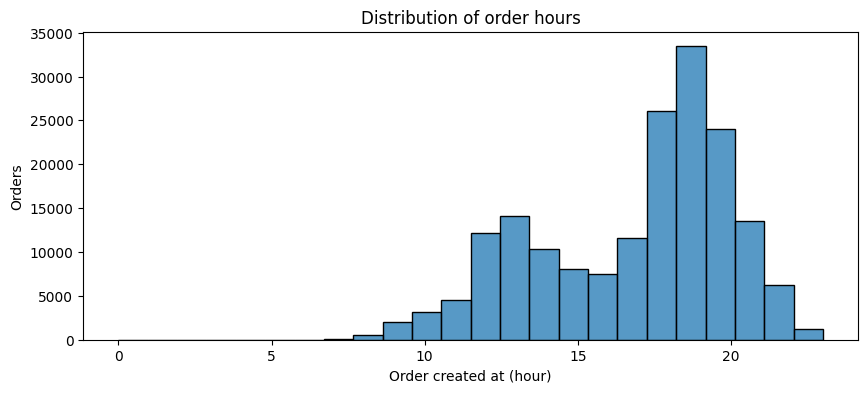

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(data['hour'], bins=24)
plt.title('Distribution of order hours')
plt.xlabel('Order created at (hour)')
plt.ylabel('Orders')
plt.show()

Looks like what one would expect. Normal opening hours and busier around lunch time and evening.

## Outlier removal

The stats of `delivery_duration` indicate there are extreme outliers

In [15]:
data['delivery_duration'].describe()

count    178534.000000
mean       2866.145765
std        1653.784423
min         101.000000
25%        2105.000000
50%        2662.000000
75%        3383.000000
max      373879.000000
Name: delivery_duration, dtype: float64

There are outliers on the right side of the mean. We can start by removing samples beyond 3 standard deviations.

In [16]:
u = data['delivery_duration'].mean()
sd = data['delivery_duration'].std()
data = data[data['delivery_duration'] < (u + 3 * sd)]

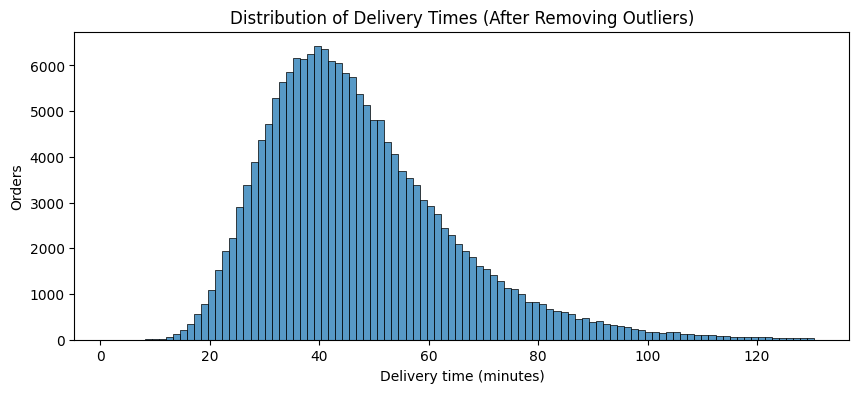

In [17]:
plt.figure(figsize=(10, 4))
sns.histplot(data['delivery_duration']/60, bins=100)
plt.title('Distribution of Delivery Times (After Removing Outliers)')
plt.xlabel('Delivery time (minutes)')
plt.ylabel('Orders')
plt.show()

## Dasher ratios
These metrics are more clearly more relevant than the ones provides.

In [18]:
data['total_free_dashers'] = data['total_onshift_dashers'] - data['total_busy_dashers']
data['busy_to_total_dashers'] = data['total_busy_dashers'] / data['total_onshift_dashers']
data['order_to_dasher_ratio'] = data['total_outstanding_orders'] / data['total_onshift_dashers']
data['order_to_free_dasher_ratio'] = data['total_outstanding_orders'] / data['total_free_dashers']

import numpy as np

data.replace([np.nan, np.inf], 999999.9, inplace=True)
data.replace([-np.inf], -999999.9, inplace=True)

## Handle categorical features

In [19]:
categorical = ['store_id', 'market_id', 'store_primary_category', 'order_protocol', 'day']

unique_values = {'Columns': [], 'Unique values': []}

for feature in categorical:
    unique_values['Columns'].append(feature)
    unique_values['Unique values'].append(data[feature].nunique())

pd.DataFrame(unique_values)

,Columns,Unique values
0,store_id,5640
1,market_id,6
2,store_primary_category,73
3,order_protocol,7
4,day,7


We could create a `prep_time_bias` for each store.  
The effect of `store_primary_category` could be collinear, but individual time bias could be very powerful.  
We will drop `store_id` as the value itself is arbitrary.

In [20]:
# Calculate the preparation time for each row
data['prep_time'] = data['delivery_duration'] - data['estimated_store_to_consumer_driving_duration']

mean_prep_time_per_store = data.groupby('store_id')['prep_time'].mean().reset_index()
mean_prep_time_per_store.columns = ['store_id', 'mean_prep_time']

# Compute the mean preparation time across all stores
mean_prep_time_all_stores = data['prep_time'].mean()
data = data.merge(mean_prep_time_per_store, on='store_id', how='left')

# Calculate the bias for each row
data['prep_time_bias'] = data['mean_prep_time'] - mean_prep_time_all_stores

data.drop(columns=['mean_prep_time', 'prep_time'], inplace=True)

# bye bye store_id 👋
data.drop(columns=['store_id'], inplace=True)

## Visualize the impact on delivery duration

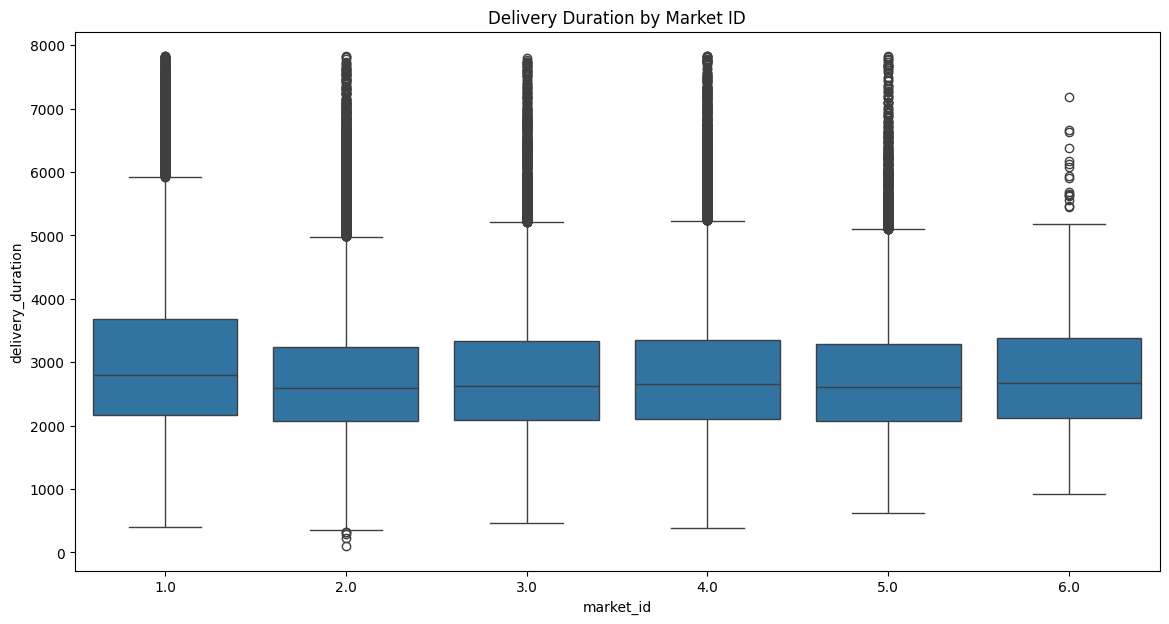

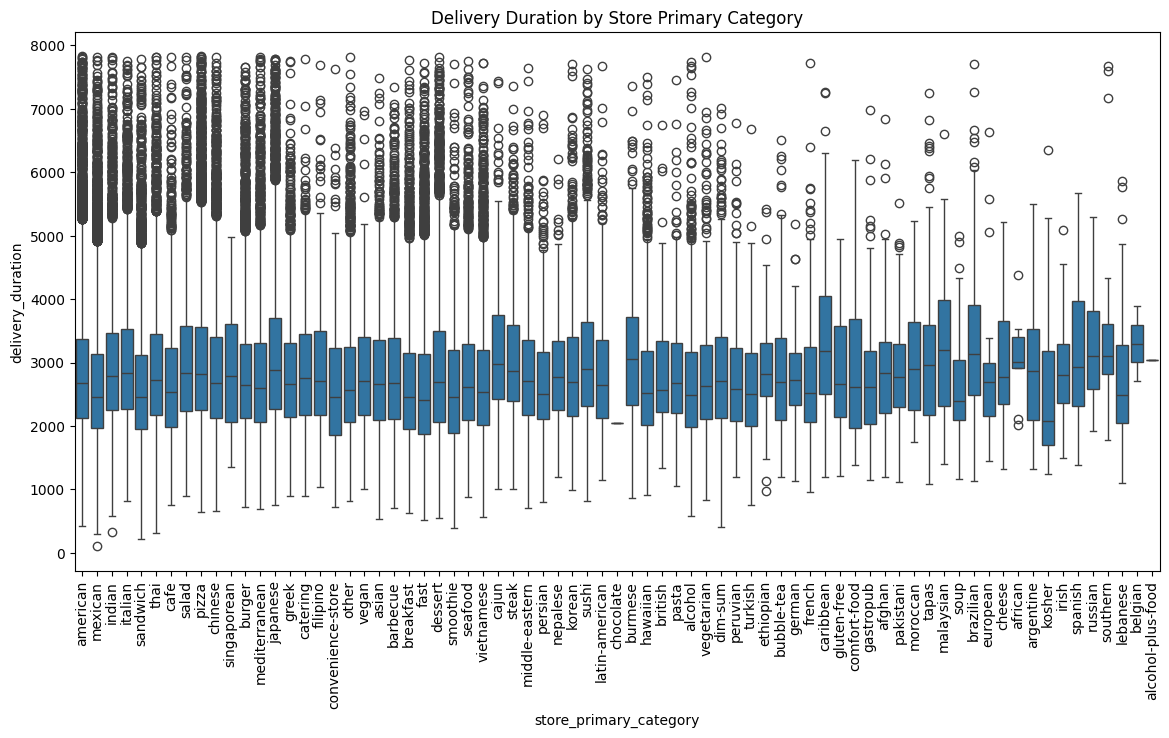

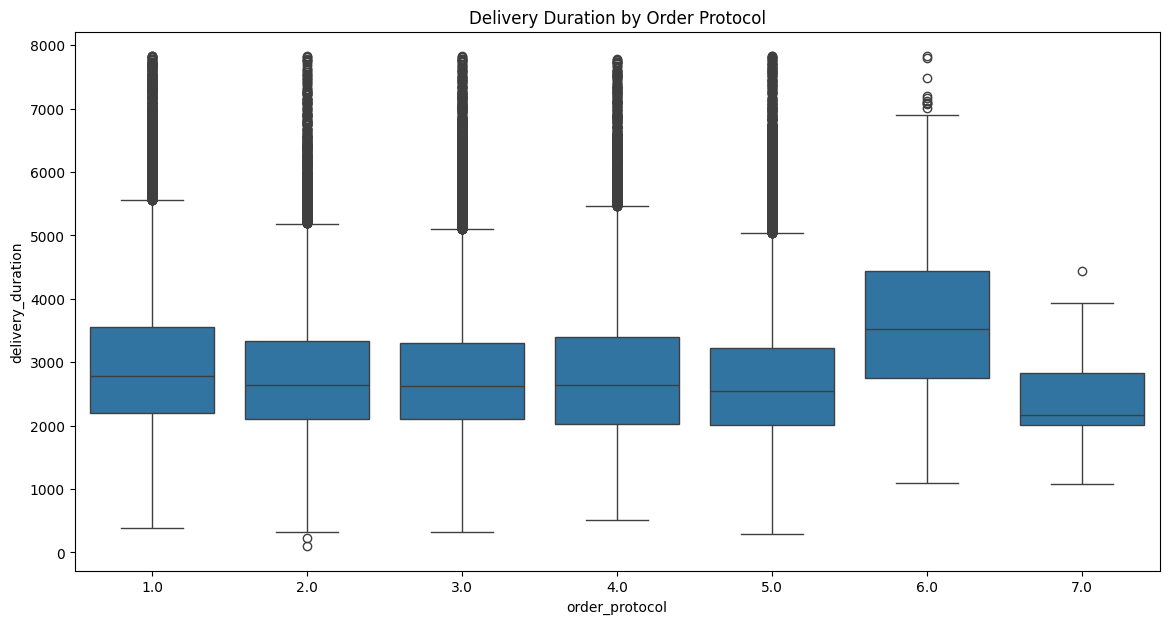

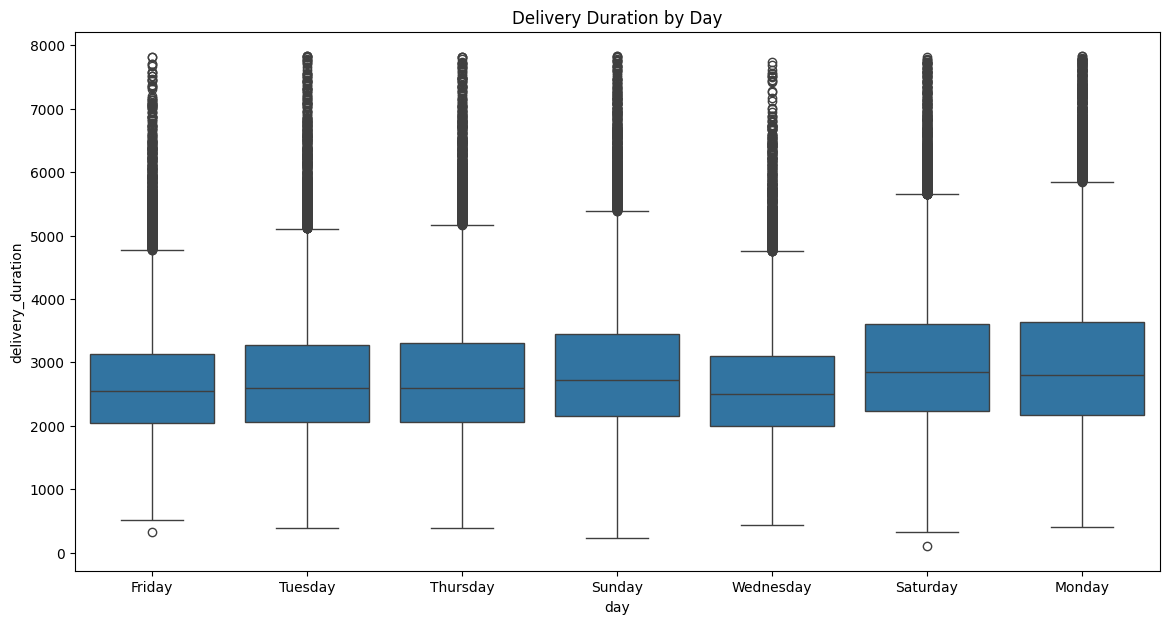

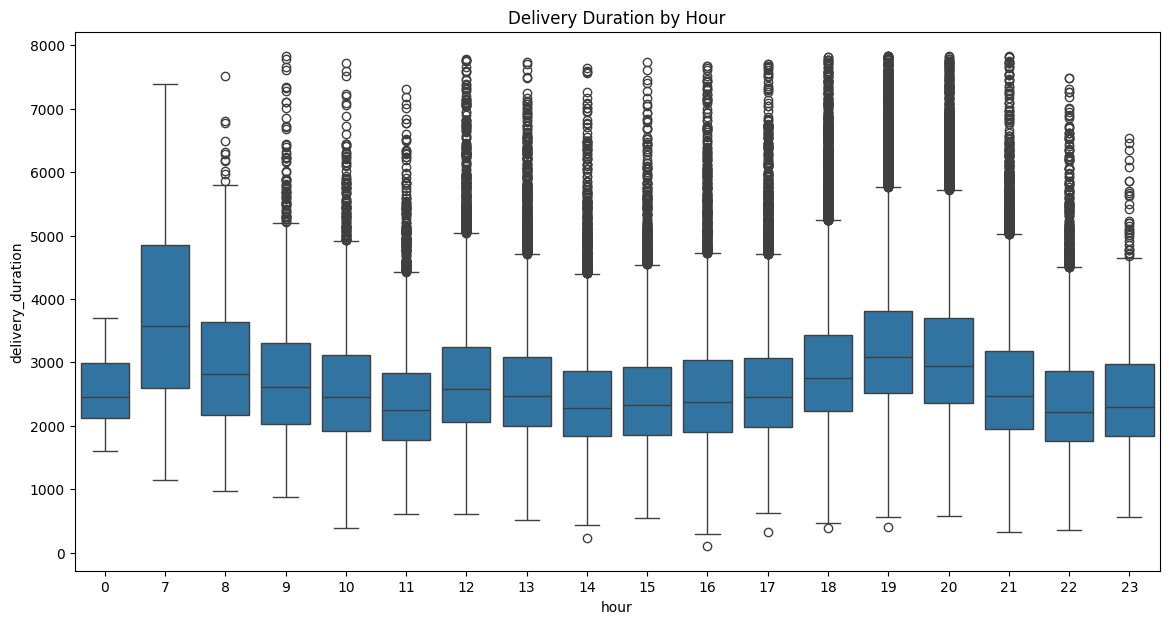

In [21]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='market_id', y='delivery_duration', data=data)
plt.title('Delivery Duration by Market ID')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='store_primary_category', y='delivery_duration', data=data)
plt.title('Delivery Duration by Store Primary Category')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='order_protocol', y='delivery_duration', data=data)
plt.title('Delivery Duration by Order Protocol')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='day', y='delivery_duration', data=data)
plt.title('Delivery Duration by Day')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='hour', y='delivery_duration', data=data)
plt.title('Delivery Duration by Hour')
plt.show()

## One hot encode the features

In [22]:
data.drop(columns=['store_primary_category'],inplace=True)

for col in ['order_protocol', 'market_id', 'day', 'hour']:
    dummies = pd.get_dummies(data[col])
    dummies = dummies.add_prefix('~' if col == 'store_primary_category' else f'{col}_') # renaming store_primary_category
    data = pd.concat([data.drop(columns=[col]), dummies], axis=1)

## Correlation Analysis

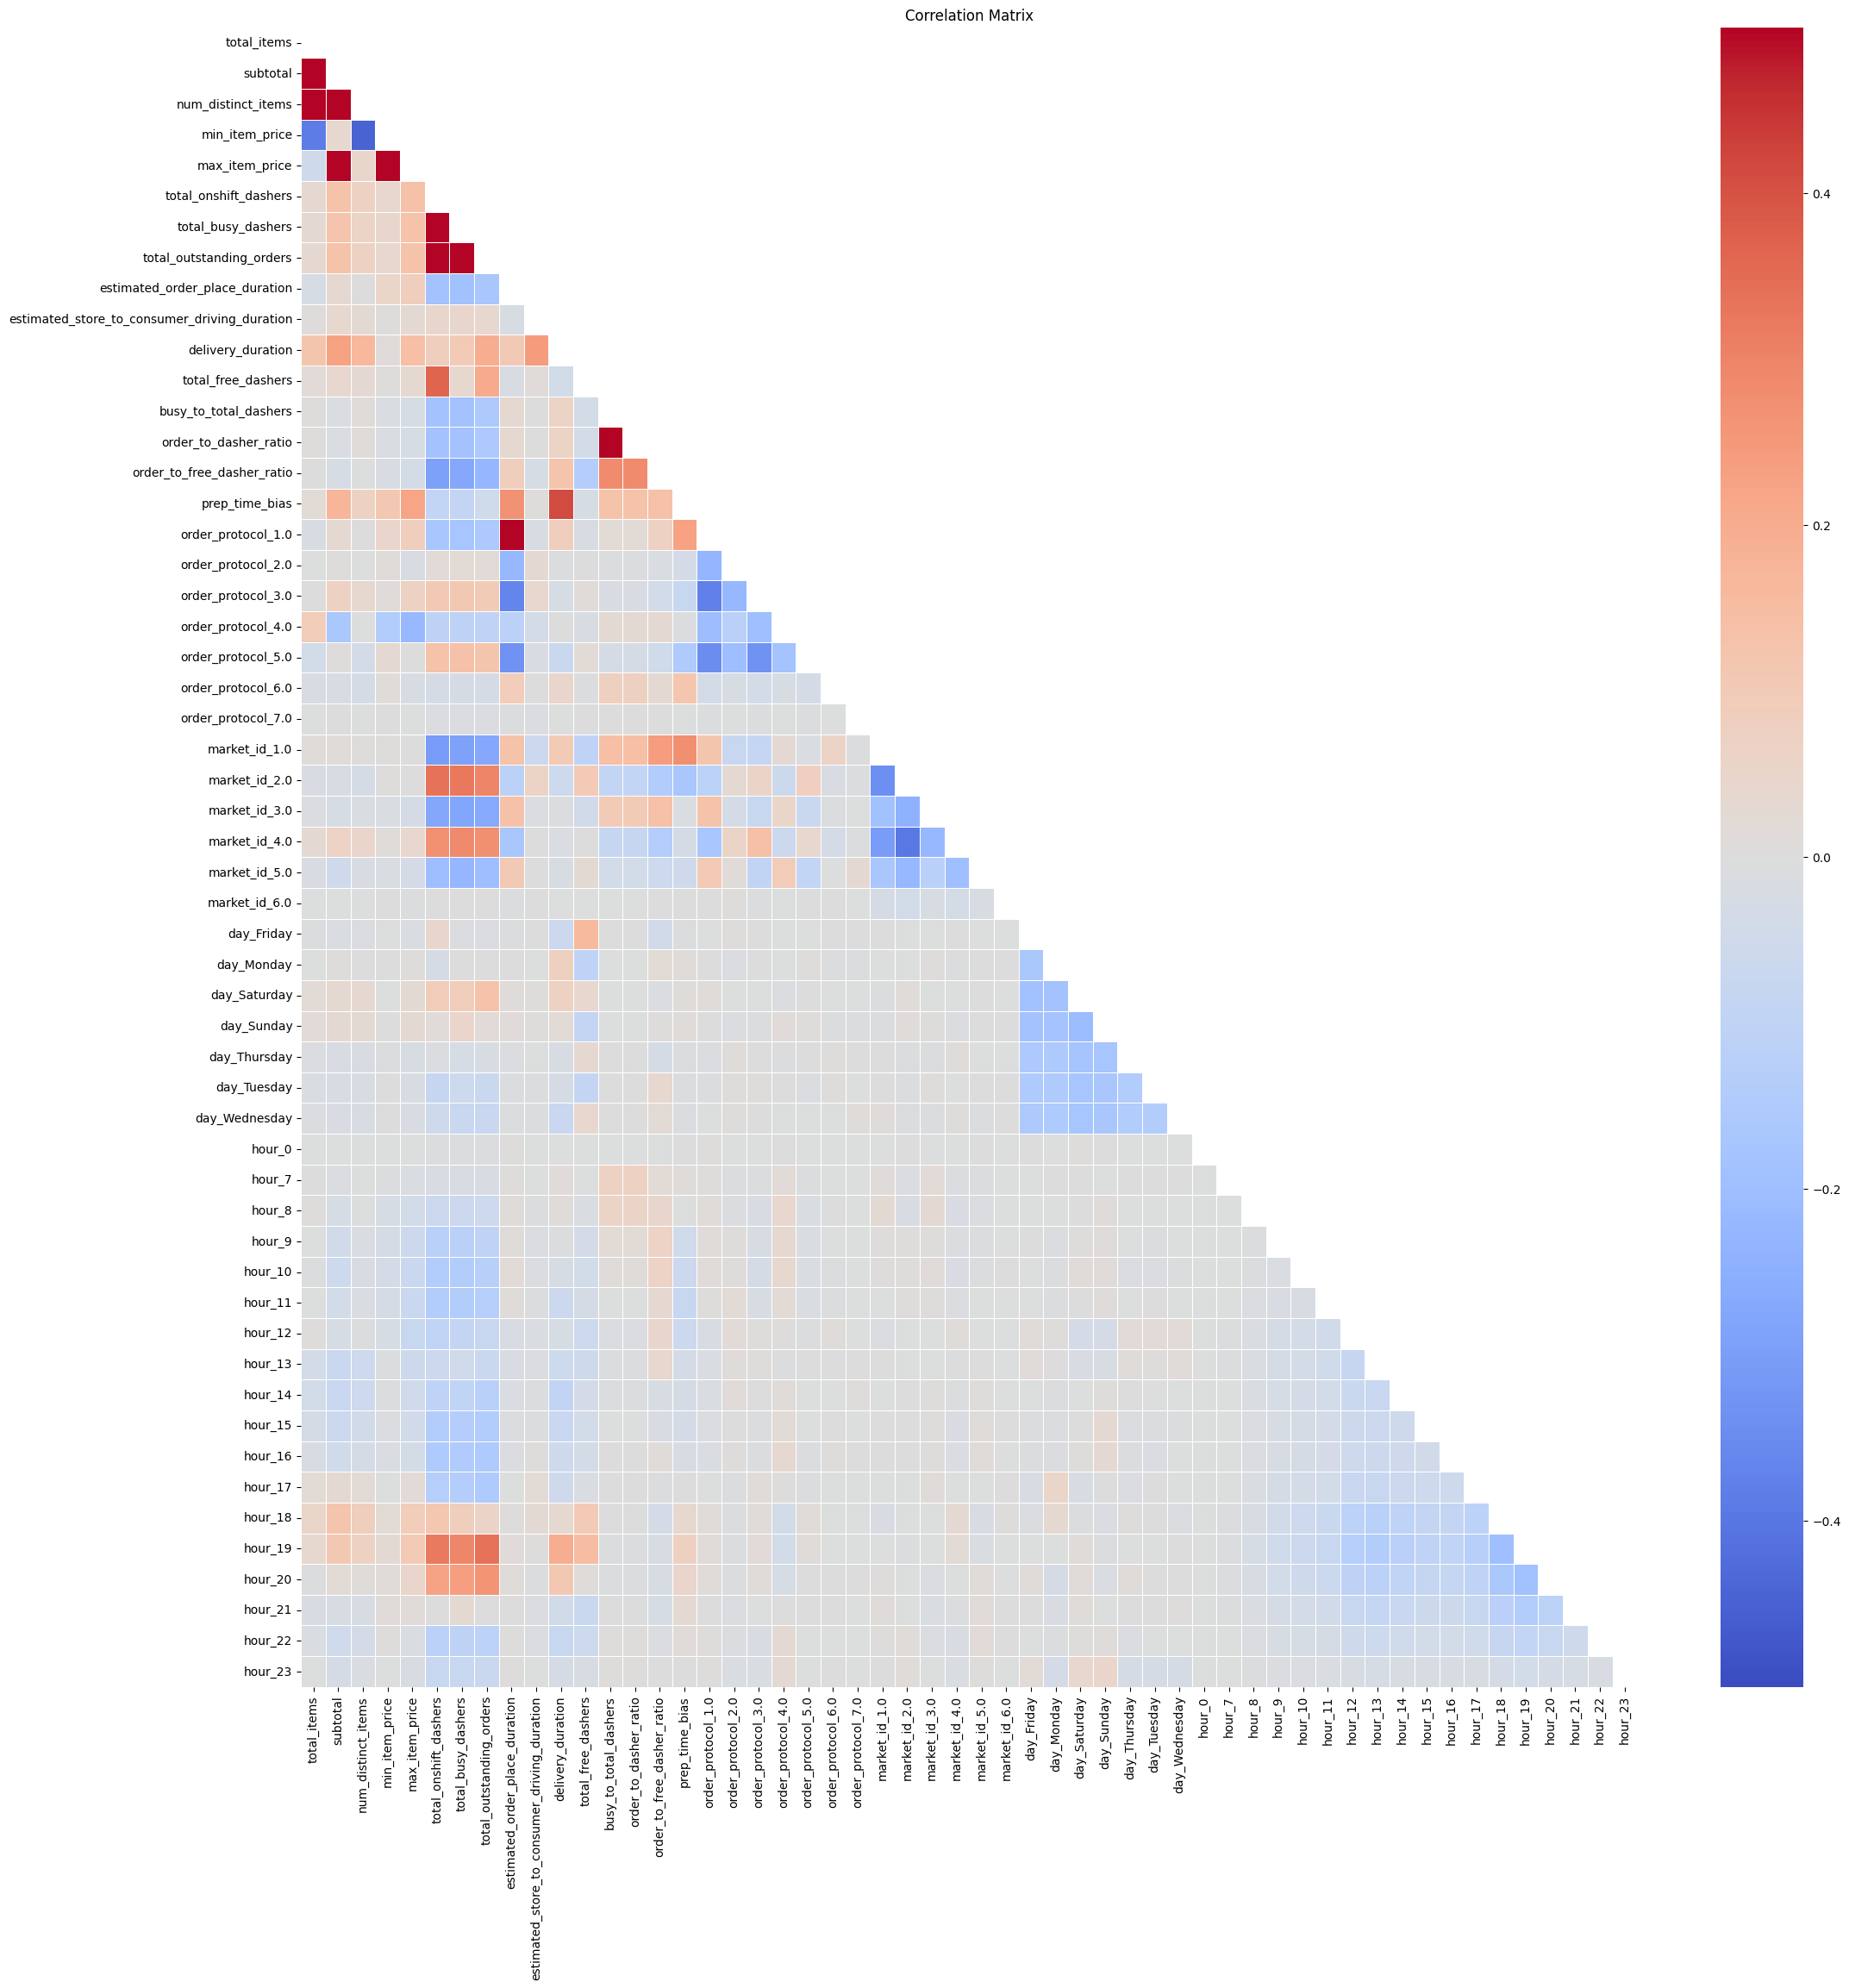

In [23]:
plt.figure(figsize=(25, 25))
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,cmap='coolwarm', linewidths=0.5, vmin=-0.5, vmax=0.5)
plt.title('Correlation Matrix')
plt.show()

## List highly correlated features

In [24]:
threshold = 0.4
high_corr_var = np.where(np.abs(correlation_matrix) > threshold)
high_corr_var = [(correlation_matrix.columns[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
                 for x, y in zip(*high_corr_var) if x != y and x < y]

high_corr_var.sort(key=lambda x: abs(x[2]), reverse=True)
pd.DataFrame(high_corr_var, columns=['Feature 1', 'Feature 2', 'Correlation'])

,Feature 1,Feature 2,Correlation
0,busy_to_total_dashers,order_to_dasher_ratio,0.998256
1,total_onshift_dashers,total_busy_dashers,0.943516
2,total_onshift_dashers,total_outstanding_orders,0.936212
3,total_busy_dashers,total_outstanding_orders,0.932885
4,estimated_order_place_duration,order_protocol_1.0,0.899578
5,total_items,num_distinct_items,0.759048
6,subtotal,num_distinct_items,0.681524
7,total_items,subtotal,0.556059
8,min_item_price,max_item_price,0.541264
9,subtotal,max_item_price,0.508698


## Choose features to exclude from model

In [25]:
collinear = ['total_items', 'num_distinct_items', 'min_item_price',
             'order_protocol_1.0',
           # 'total_busy_dashers',
             'total_onshift_dashers', 'order_to_dasher_ratio', 'busy_to_total_dashers']

I added total_busy_dashers back in because there was a slight improvement

Model: LinearRegression
Mean Squared Error: 658534.77
Root Mean Squared Error: 811.50
Mean Absolute Error: 605.61
Mean Absolute Percentage Error: 22.82%
R^2: 0.3882
Cross-Validation Mean RMSE: 806.38
--------------------------------------------------


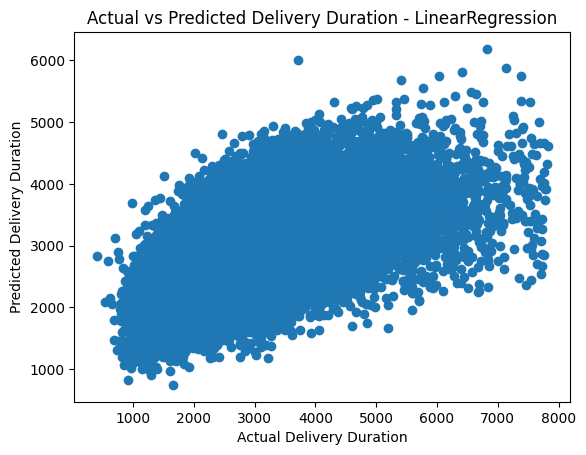

Model: Ridge
Mean Squared Error: 658543.04
Root Mean Squared Error: 811.51
Mean Absolute Error: 605.61
Mean Absolute Percentage Error: 22.82%
R^2: 0.3882
Cross-Validation Mean RMSE: 806.36
--------------------------------------------------


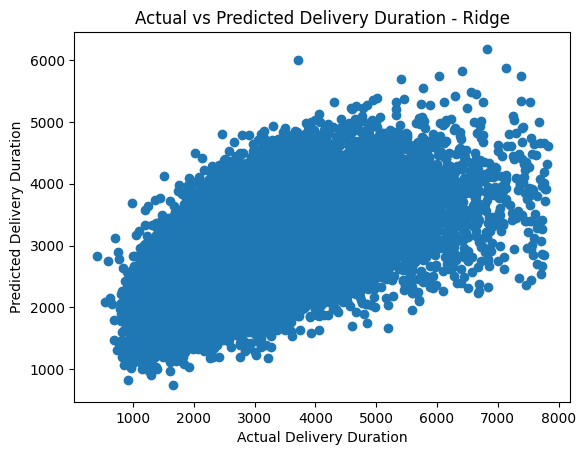

Model: Lasso
Mean Squared Error: 658859.07
Root Mean Squared Error: 811.70
Mean Absolute Error: 605.64
Mean Absolute Percentage Error: 22.83%
R^2: 0.3879
Cross-Validation Mean RMSE: 806.46
--------------------------------------------------


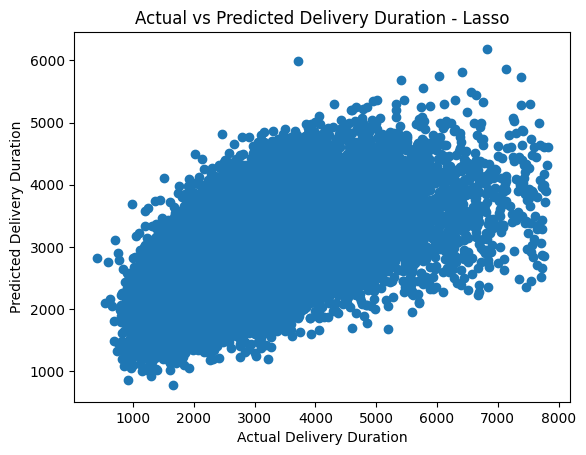

Model: DecisionTreeRegressor
Mean Squared Error: 758473.55
Root Mean Squared Error: 870.90
Mean Absolute Error: 652.38
Mean Absolute Percentage Error: 24.85%
R^2: 0.2954
Cross-Validation Mean RMSE: 865.58
--------------------------------------------------


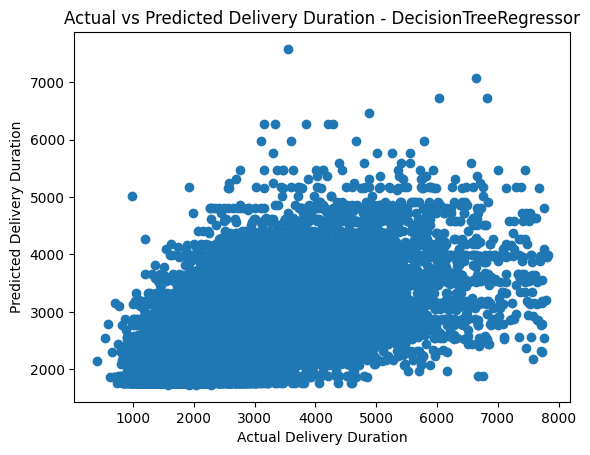

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

features = data.drop(columns=['delivery_duration', *collinear])
target = data['delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models and techniques to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    # 'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=1, max_depth=8),
    #'Random Forest Regressor': RandomForestRegressor(random_state=1),
    #'Support Vector Regressor': SVR(kernel='linear'),
    #'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=1)
}

# Function to train, evaluate, and visualize a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    cv_rmse_mean = cv_rmse_scores.mean()
    
    print(f'Model: {type(model).__name__}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Absolute Percentage Error: {mape:.2f}%')
    print(f'R^2: {r2:.4f}')
    print(f'Cross-Validation Mean RMSE: {cv_rmse_mean:.2f}')
    print('-' * 50)
    
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Delivery Duration')
    plt.ylabel('Predicted Delivery Duration')
    plt.title(f'Actual vs Predicted Delivery Duration - {type(model).__name__}')
    plt.show()

for model_name, model in models.items():
    evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

# Best Model

In [28]:
features_scaled = scaler.fit_transform(features)

lr_model = LinearRegression()
lr_model.fit(features_scaled, target)

weights_df = pd.DataFrame({
    'Feature': features.columns,
    'Weight': lr_model.coef_
})

intercept_df = pd.DataFrame({
    'Feature': ['Intercept'],
    'Weight': [lr_model.intercept_]
})

pd.concat([intercept_df, weights_df], ignore_index=True)

,Feature,Weight
0,Intercept,2.835895e+03
1,subtotal,1.502894e+02
2,max_item_price,-4.018288e+01
3,total_busy_dashers,-7.147216e+02
4,total_outstanding_orders,8.449656e+02
5,estimated_order_place_duration,4.215201e+01
6,estimated_store_to_consumer_driving_duration,2.495024e+02
7,total_free_dashers,-2.027033e+02
8,order_to_free_dasher_ratio,5.735523e+01
9,prep_time_bias,3.527303e+02


This ETA is predicted at the time of order. The ETA can be updated with better predictions as the order reaches subsequent steps. We will have much more accurate predictions once the order is out for delivery.

# Findings

- Strange negative values and many nulls in the `total_*_dasher/order` data. Verify these functions.

- `prep_time_bias` was a good discovery, ignoring it makes the model significantly worse. A new restaurant would of course start out with a neutral value, and get updated values as the model is updated with new data.

# Follow-up

- Any other features that can be derived from the dataset?
- Try Deep Learning models

- Experiment idea: What if the model assumed the mean delivery duration is 40 mins and our target is an offset to this mean?
- Experiment idea: Narrow the (upper) bound of samples in the training set